# Data-analysis of Titanic Deaths

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load CSV into Dataframe from Data folder
titanic = pd.read_csv('data/train-2.csv')

In [147]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
def convert_col_to_numerical(df, col):
    unique_vals = df[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    df[col] = df[col].replace(val_dict)
    return df

titanic = convert_col_to_numerical(titanic, 'Sex') # Male = 0 | Female = 1
titanic = convert_col_to_numerical(titanic, 'Embarked') # S = 0 | C = 1 | Q = 2

titanic.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [149]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


<Axes: >

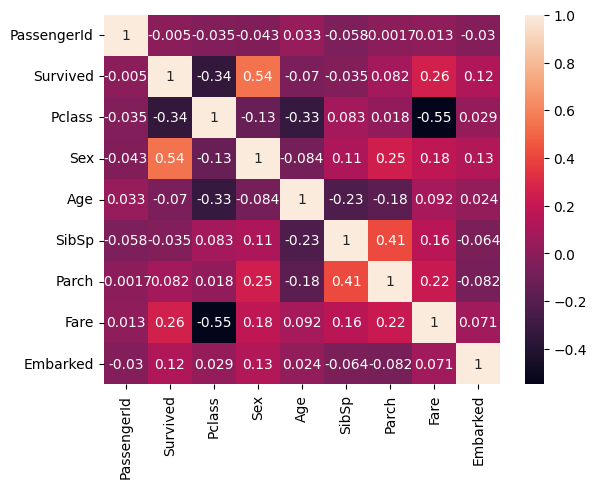

In [150]:
sns.heatmap(titanic.corr(), annot=True)

In [151]:
print(titanic.shape)
titanic.loc[titanic["Age"]<=18].value_counts()

(891, 9)


PassengerId  Survived  Pclass  Sex  Age   SibSp  Parch  Fare     Embarked
8            0         3       0    2.0   3      1      21.0750  0.0         1
676          0         3       0    18.0  0      0      7.7750   0.0         1
619          1         2       1    4.0   2      1      39.0000  0.0         1
635          0         3       1    9.0   3      2      27.9000  0.0         1
643          0         3       1    2.0   3      2      27.9000  0.0         1
                                                                            ..
209          1         3       1    16.0  0      0      7.7500   2.0         1
206          0         3       1    2.0   0      1      10.4625  0.0         1
205          1         3       0    18.0  0      0      8.0500   0.0         1
194          1         2       0    3.0   1      1      26.0000  0.0         1
876          1         3       1    15.0  0      0      7.2250   1.0         1
Name: count, Length: 139, dtype: int64

In [152]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [153]:
X = titanic.drop(['Survived'], axis=1)
y  = titanic['Survived']

X_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(y))]

X_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(y)):]

In [154]:
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train, y_train)
print(KNN.score(X_test, y_test))

DT = DecisionTreeClassifier(max_leaf_nodes=26)
DT.fit(X_train, y_train)
DT.score(X_test, y_test)



0.7486033519553073


0.8603351955307262

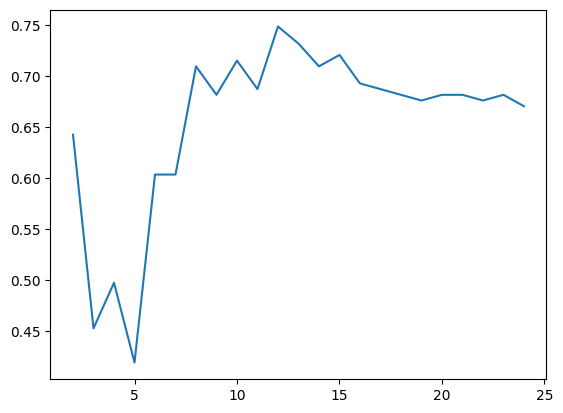

In [155]:
# 12 ist der beste KNN
scores = []
for i in range(2, 25):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))
plt.plot(range(2, 25), scores)
plt.show()


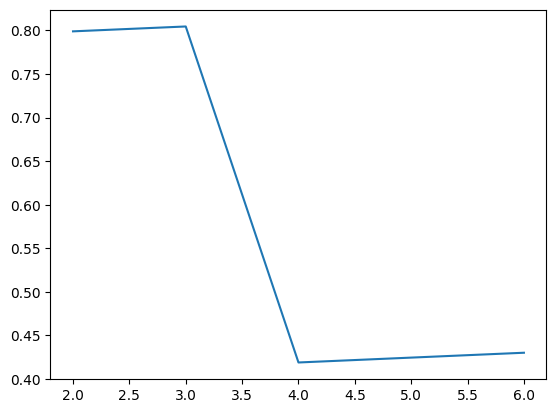

In [156]:
# 26 ist die beste Anzahl an leaf nodes
scores = []
for i in range(2, 7):
    DT = DecisionTreeClassifier(max_leaf_nodes=26, max_depth=i)
    DT.fit(X_train, y_train)
    scores.append(DT.score(X_test, y_test))
plt.plot(range(2, 7), scores)
plt.show()

[Text(0.4939516129032258, 0.9285714285714286, 'x[2] <= 0.5\ngini = 0.476\nsamples = 712\nvalue = [434, 278]'),
 Text(0.25806451612903225, 0.7857142857142857, 'x[1] <= 1.5\ngini = 0.311\nsamples = 456\nvalue = [368, 88]'),
 Text(0.12903225806451613, 0.6428571428571429, 'x[0] <= 565.5\ngini = 0.462\nsamples = 102\nvalue = [65, 37]'),
 Text(0.06451612903225806, 0.5, 'x[3] <= 17.5\ngini = 0.4\nsamples = 76\nvalue = [55, 21]'),
 Text(0.03225806451612903, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.0967741935483871, 0.35714285714285715, 'x[3] <= 53.0\ngini = 0.372\nsamples = 73\nvalue = [55, 18]'),
 Text(0.06451612903225806, 0.21428571428571427, 'x[6] <= 27.135\ngini = 0.428\nsamples = 58\nvalue = [40, 18]'),
 Text(0.03225806451612903, 0.07142857142857142, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.0967741935483871, 0.07142857142857142, 'gini = 0.375\nsamples = 48\nvalue = [36, 12]'),
 Text(0.12903225806451613, 0.21428571428571427, 'gini = 0.0\nsamples

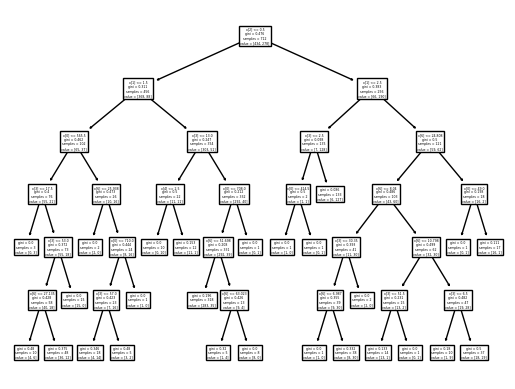

In [157]:
# print decision tree
from sklearn import tree
tree.plot_tree(DT)



In [158]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,38.0,1,0,71.2833,1.0
2,3,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,3,0,35.0,0,0,8.0500,0.0


In [159]:
idiot = [max(X['PassengerId'])+1, 1, 1, 34, 0, 1, 8, 0]

DT.predict([idiot])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [160]:

KNN.predict([idiot])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])